In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("C:/Users/AKANKSHA/Downloads/mail_data.csv")

In [40]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [42]:
df=df.where((pd.notnull(df)),'')

In [43]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df.loc[df['Category']=='spam','Category']=0
df.loc[df['Category']=='ham','Category']=1

In [45]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
X=df['Message']
y=df['Category']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
tf=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')

In [63]:
X_train_features=tf.fit_transform(X_train)
X_test_features=tf.transform(X_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
model =LogisticRegression()

In [53]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [54]:
pred=model.predict(X_train_features)
score=accuracy_score(y_train,pred)

In [55]:
print(score)

0.97083239847431


In [56]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [57]:
def report(model):
    preds = model.predict(X_test_features)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_features,y_test)

NB MODEL
              precision    recall  f1-score   support

           0       0.98      0.59      0.73       135
           1       0.95      1.00      0.97       980

    accuracy                           0.95      1115
   macro avg       0.96      0.79      0.85      1115
weighted avg       0.95      0.95      0.94      1115



c:\Users\AKANKSHA\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


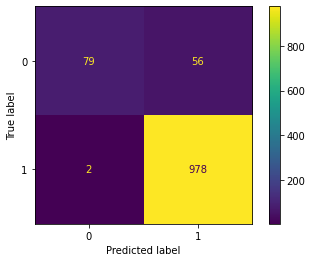

In [58]:
print("NB MODEL")
report(model)

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('lr',LogisticRegression())])